In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Functions

In [2]:
#assign cluster
#move centroids
#check for finish
def centroids(x,k):
    random_index=random.sample(range(0,x.shape[0]),k)
    centroids=x[random_index]
    return centroids

In [3]:
def assign_cluster(x,centroids):
    distances=[]
    for row in x:
        for centroid in centroids:
            distance= np.sqrt(np.dot((row-centroid),(row-centroid)))
            distances.append(distance)
    distances=np.array(distances).reshape(-1,centroids.shape[0])
    cluster_group=np.argmin(distances,axis=1)
    return (cluster_group)

In [4]:
def move_centroids(x,cluster_group):
    new_centroids=[]
    for type in np.unique(cluster_group):
        cnt=x[np.where(cluster_group==type)].mean(axis=0)
        new_centroids.append(cnt)
    return np.array(new_centroids)
    

In [5]:
def fit(x,n_cluster,max_iters,centroids,assign_cluster,move_cent):
    init_cent=centroids(x,n_cluster)
    
    cluster_group = []
    new_cent = []
    new_cent.append(init_cent)
    for i in range(max_iters):
        cluster_group.append(assign_cluster(x,new_cent[-1]))
        new_cent.append(move_cent(x,cluster_group[-1]))
        
        if (new_cent[-1]==new_cent[-2]).all():
            print(f'no.of iteartions:{i+1}') 
            break
    
    return new_cent[-1],cluster_group[-1]

In [6]:
def clf(x,c_g):
    X=[]
    for type in np.unique(c_g):
        X.append(x[np.where(c_g==type)])
    return X

In [7]:
def z_normalize(x):
    mu=np.mean(x,axis=0)
    sigma=np.std(x,axis=0)
    x_norm=(x-mu)/sigma
    return x_norm,mu , sigma

# Load Data


In [31]:
df=pd.read_csv('Kmean_dataset.csv')
x_train=np.array(df)
x_norm,mu,sigma=z_normalize(x_train) 

# Fit data

In [32]:
n_c,c_g=fit(x_train,2,1000,centroids,assign_cluster,move_centroids)
print(f'final_assigned_cluster:{c_g}')

no.of iteartions:3
final_assigned_cluster:[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [35]:
n_c_norm,c_g_norm=fit(x_norm,3,1000,centroids,assign_cluster,move_centroids)
print(f'final_assigned_cluster:{c_g_norm}')

no.of iteartions:5
final_assigned_cluster:[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [36]:
X_train=clf(x_train,c_g)
X_norm=clf(x_norm,c_g_norm)

# finding elbow

In [37]:
def compute_dist(x,x_train):
    distance=np.sqrt(np.sum((x-x_train)**2,axis=1))
    return np.sum(distance)

In [38]:
def wcss(x_train,n_c,c_g):
    wcss=0
    X=clf(x_train,c_g)
    for i,j in zip(n_c,X):
        wcss+=compute_dist(i,j)
    return wcss

In [39]:
def elbow(x_train,max_cluster):
    wcss_hist=[]    
    for i in range(1,max_cluster):
        n_c,c_g=fit(x_train,i,1000,centroids,assign_cluster,move_centroids)
        wcss_hist.append(wcss(x_train,n_c,c_g))
    for i in range(1,max_cluster-1):
        slope=wcss_hist[i-1]-wcss_hist[i]
        #print(f'slope{i}:{slope}')
    plt.plot(np.arange(1,max_cluster),np.array(wcss_hist)),
    plt.scatter(np.arange(1,max_cluster),np.array(wcss_hist))
    plt.title('With Normalization')
    plt.show()
    pass

no.of iteartions:2
no.of iteartions:7
no.of iteartions:6
no.of iteartions:9
no.of iteartions:6
no.of iteartions:9
no.of iteartions:9
no.of iteartions:9
no.of iteartions:9


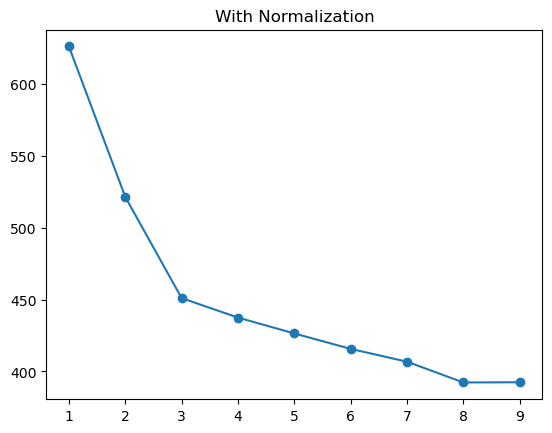

In [40]:
elbow(x_norm,10)

no.of iteartions:2
no.of iteartions:9
no.of iteartions:8
no.of iteartions:6
no.of iteartions:13
no.of iteartions:4
no.of iteartions:9
no.of iteartions:7
no.of iteartions:9


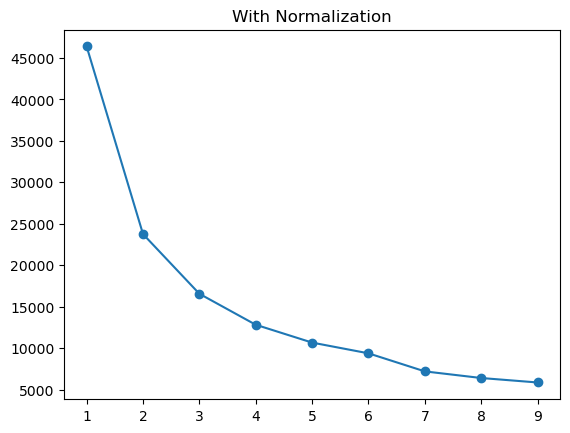

In [41]:
elbow(x_train,10)